# Case study on Supervised learning

In [77]:
##1. Read the dataset to the python environment.

import pandas as pd
data1=pd.read_excel(r'C:\Users\ANJU SAJI\Downloads\iris.xls')
data1

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [78]:
##2. Do necessary pre-processing steps.


In [79]:
# checking nul value
data1.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

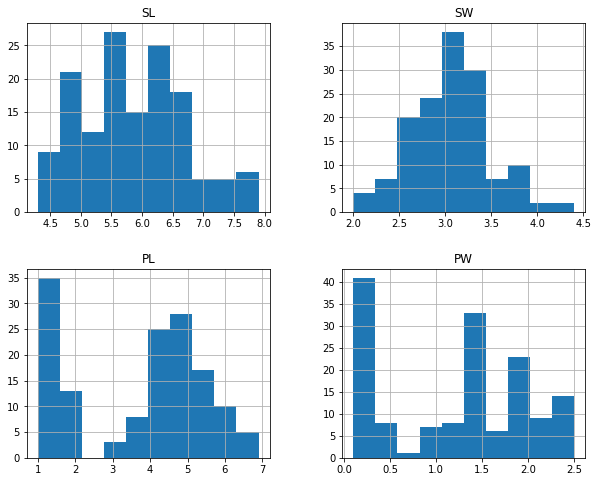

In [80]:
## to check the skewness

import matplotlib.pyplot as plt
freqgraph=data1.select_dtypes(include=['float','int64'])
freqgraph.hist(figsize=(10,8))
plt.show()

In [81]:
#to fill the null value with median


data1['SL']=data1['SL'].fillna(data1['SL'].median())
data1['SW']=data1['SW'].fillna(data1['SW'].median())
data1['PL']=data1['PL'].fillna(data1['PL'].median())

In [82]:
data1.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'SL')

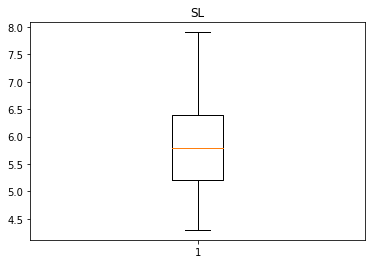

In [83]:
##  check the outliers

import matplotlib.pyplot as plt
plt.boxplot(data1['SL' ])
plt.title('SL')


Text(0.5, 1.0, 'SW')

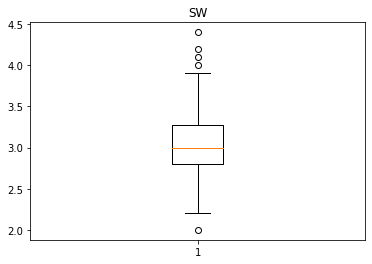

In [84]:
import matplotlib.pyplot as plt
plt.boxplot(data1['SW' ])
plt.title('SW')

Text(0.5, 1.0, 'PL')

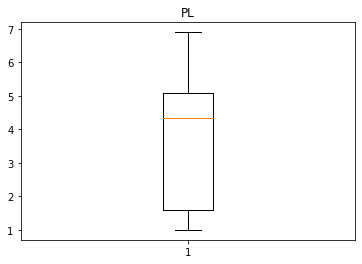

In [85]:
import matplotlib.pyplot as plt
plt.boxplot(data1['PL' ])
plt.title('PL')

Text(0.5, 1.0, 'PW')

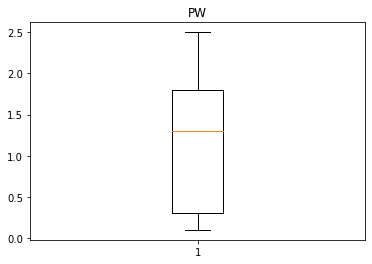

In [86]:
import matplotlib.pyplot as plt
plt.boxplot(data1['PW' ])
plt.title('PW')

In [87]:
##to handle outliers in SW

import numpy as np
Q1 = np.percentile(data1['SW'],25,interpolation='midpoint')
Q3 = np.percentile(data1['SW'],75,interpolation='midpoint')
IQR = Q3-Q1
print('Interquartile range is', IQR)
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR
print('low_limit is', low_limit)
print('up_limit is', high_limit)



Interquartile range is 0.4500000000000002
low_limit is 2.1249999999999996
up_limit is 3.9250000000000003


In [88]:
index=data1['SW'][(data1['SW']<low_limit)|(data1['SW']>high_limit)].index
data1.drop(index,inplace=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x169b3b1e50>,
 'caps': [<matplotlib.lines.Line2D at 0x169b3c1460>,
 'boxes': [<matplotlib.lines.Line2D at 0x169b3b1ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x169b3c1b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x169b3c1f10>],
 'means': []}

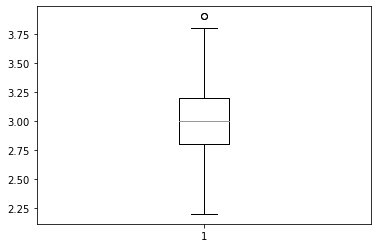

In [89]:
plt.boxplot(x=data1['SW'])

In [90]:
##3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

x=data1.drop('Classification',axis=1)
y=data1['Classification']

In [91]:


## to  split the data
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [92]:
##  Logistic Regression

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_pred=logisticRegr.predict(x_test)

In [93]:
y_pred[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [94]:
y_test[0:5]

102     Iris-virginica
45         Iris-setosa
81     Iris-versicolor
2          Iris-setosa
7          Iris-setosa
Name: Classification, dtype: object

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("accuracy =",accuracy_score(y_test,y_pred))
print("precision =",precision_score(y_test,y_pred,average='macro'))
print("recall =",recall_score(y_test,y_pred,average='macro'))
print("F1 score =",f1_score(y_test,y_pred,average='macro'))

accuracy = 0.918918918918919
precision = 0.9166666666666666
recall = 0.9299145299145298
F1 score = 0.9152380952380952


In [96]:
temp=[]
temp.append(['Logistic regression',round(f1_score(y_test,y_pred,average='macro'),5)])

In [97]:
##  Random Forest

from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()
ran.fit(x_train,y_train)
y_pred=ran.predict(x_test)

In [98]:
y_pred[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [99]:
y_test[0:5]

102     Iris-virginica
45         Iris-setosa
81     Iris-versicolor
2          Iris-setosa
7          Iris-setosa
Name: Classification, dtype: object

In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("accuracy =",accuracy_score(y_test,y_pred))
print("precision =",precision_score(y_test,y_pred,average='macro'))
print("recall =",recall_score(y_test,y_pred,average='macro'))
print("F1 score =",f1_score(y_test,y_pred,average='macro'))

accuracy = 0.918918918918919
precision = 0.9166666666666666
recall = 0.9333333333333332
F1 score = 0.9153439153439153


In [101]:
temp.append(['Random forest',round(f1_score(y_test,y_pred,average='macro'),5)])

In [105]:
##  Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [103]:
y_pred[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [60]:
y_test[0:5]

1          Iris-setosa
47         Iris-setosa
58     Iris-versicolor
148     Iris-virginica
88     Iris-versicolor
Name: Classification, dtype: object

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("accuracy =",accuracy_score(y_test,y_pred))
print("precision =",precision_score(y_test,y_pred,average='macro'))
print("recall =",recall_score(y_test,y_pred,average='macro'))
print("F1 score =",f1_score(y_test,y_pred,average='macro'))

accuracy = 0.918918918918919
precision = 0.9411764705882352
recall = 0.923076923076923
F1 score = 0.9242636746143059


In [62]:
temp.append(['decision tree',round(f1_score(y_test,y_pred,average='macro'),5)])

In [106]:
##svm

from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [107]:
y_pred[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [108]:
y_test[0:5]

102     Iris-virginica
45         Iris-setosa
81     Iris-versicolor
2          Iris-setosa
7          Iris-setosa
Name: Classification, dtype: object

In [109]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("accuracy =",accuracy_score(y_test,y_pred))
print("precision =",precision_score(y_test,y_pred,average='macro'))
print("recall =",recall_score(y_test,y_pred,average='macro'))
print("F1 score =",f1_score(y_test,y_pred,average='macro'))

accuracy = 0.972972972972973
precision = 0.9666666666666667
recall = 0.9777777777777779
F1 score = 0.9709618874773139


In [110]:
temp.append(['Linear svm',round(f1_score(y_test,y_pred,average='macro'),5)])

In [111]:
## radial svm

svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [112]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("accuracy =",accuracy_score(y_test,y_pred))
print("precision =",precision_score(y_test,y_pred,average='macro'))
print("recall =",recall_score(y_test,y_pred,average='macro'))
print("F1 score =",f1_score(y_test,y_pred,average='macro'))

accuracy = 0.8918918918918919
precision = 0.8974358974358975
recall = 0.9076923076923077
F1 score = 0.889023569023569


In [113]:
temp.append(['radial svm',round(f1_score(y_test,y_pred,average='macro'),5)])

In [114]:

##polynomial svm

svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [115]:
y_pred[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [116]:
y_test[0:5]

102     Iris-virginica
45         Iris-setosa
81     Iris-versicolor
2          Iris-setosa
7          Iris-setosa
Name: Classification, dtype: object

In [117]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("accuracy =",accuracy_score(y_test,y_pred))
print("precision =",precision_score(y_test,y_pred,average='macro'))
print("recall =",recall_score(y_test,y_pred,average='macro'))
print("F1 score =",f1_score(y_test,y_pred,average='macro'))

accuracy = 1.0
precision = 1.0
recall = 1.0
F1 score = 1.0


In [118]:
temp.append(['polynomial svm',round(f1_score(y_test,y_pred,average='macro'),5)])

In [76]:
data2 = pd.DataFrame(temp, columns = ['Algorithms', 'F1-Score'])
data2

,Algorithms,F1-Score
0,Logistic regression,0.92426
1,Random forest,0.92426
2,decision tree,0.92426
3,Linear svm,0.92426
4,radial svm,0.92426
5,polynomial svm,0.92426
